In [1]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd='C:/Users/Mula Ram/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'

In [2]:
import cv2
# Import PyTorch Library
import torch
from torch import nn

# Import external libraries
import argparse
import numpy as np
#import opencv_wrapper as cvw
from skimage.filters import threshold_local
import json
import random
from string import ascii_uppercase, digits, punctuation
import colorama
import regex

In [3]:
img1 = cv2.imread("cleartax-invoice.jpg")
text1 = pytesseract.image_to_string(img1)
text1

"ORIGINAL FOR RECIPIENT\n\nTAX INVOICE\nDefmacro Software (P) Ltd\nFirst Floor, 23, 24 AMR TECH PARK, Block 1, HOSUR MAIN ROAD, _ !nvoice Date: 2022-01-20 07:32:26.676\nBengaluru (Bangalore) Urban Bangalore, 560068, Karnataka, India, Invoice No: DE81294237\n\nState-Code :29 Order ID: OD980115400907\nPAN #: AAFCD5862R, GSTIN #: 29AAFCD5862R1ZR ere\nCIN #: U72200DL2016PTC290345 FN «\n\nEmail: gstsupport@cleartax.in c683e2b7e22c8d481 1 c8eeSa6b4e78b6d8e5d5bbf9c5 7F77 1844d8cdfa036a36\n\nBilling Information\nAnkit Goenka\nTRADELINK INDIA\n\nFLAT NO-D1, PLOT NO-DB164, STREET NO-267, NEWTOWN, North\n24 Parganas, West Bengal, 700156\n\nWest Bengal\n\nGSTIN: 19BODPK4644C1Z3\nEmail: ankit.goenka3@gmail.com\nMobile: +91 8420673799\n\nFinal\none Qty Price Disc.  '2%9DIE taxable CGST SGST  IGST Amount\n\nValue Value (In INR)\n\nCleartax GST\n\nSoftware for\n\nProfessionals | 997331 50000.00 | 26000.00 | 24000.00 4320.00 | 4320.00 28320.00\n(Expert Pack) -\n\nCustomised\n\n28320.00\n\n# Description

In [4]:
print(text1)

ORIGINAL FOR RECIPIENT

TAX INVOICE
Defmacro Software (P) Ltd
First Floor, 23, 24 AMR TECH PARK, Block 1, HOSUR MAIN ROAD, _ !nvoice Date: 2022-01-20 07:32:26.676
Bengaluru (Bangalore) Urban Bangalore, 560068, Karnataka, India, Invoice No: DE81294237

State-Code :29 Order ID: OD980115400907
PAN #: AAFCD5862R, GSTIN #: 29AAFCD5862R1ZR ere
CIN #: U72200DL2016PTC290345 FN «

Email: gstsupport@cleartax.in c683e2b7e22c8d481 1 c8eeSa6b4e78b6d8e5d5bbf9c5 7F77 1844d8cdfa036a36

Billing Information
Ankit Goenka
TRADELINK INDIA

FLAT NO-D1, PLOT NO-DB164, STREET NO-267, NEWTOWN, North
24 Parganas, West Bengal, 700156

West Bengal

GSTIN: 19BODPK4644C1Z3
Email: ankit.goenka3@gmail.com
Mobile: +91 8420673799

Final
one Qty Price Disc.  '2%9DIE taxable CGST SGST  IGST Amount

Value Value (In INR)

Cleartax GST

Software for

Professionals | 997331 50000.00 | 26000.00 | 24000.00 4320.00 | 4320.00 28320.00
(Expert Pack) -

Customised

28320.00

# Description

Net
Amount:

Rupees

Twenty-eight

Amount

'\nSome available functions from openCV for preprocessing:\n\nMedian filter: median filter blurs out noises by taking the medium from a set of pixels\ncv2.medianBlur()\n\nDilation and erosion: dilation adds pixels to boundaries of pixels, erosion removes it\ncv2.dilate()\ncv2.erode()\ncv2.opening() #This is an erosion followed by a dilation\n'

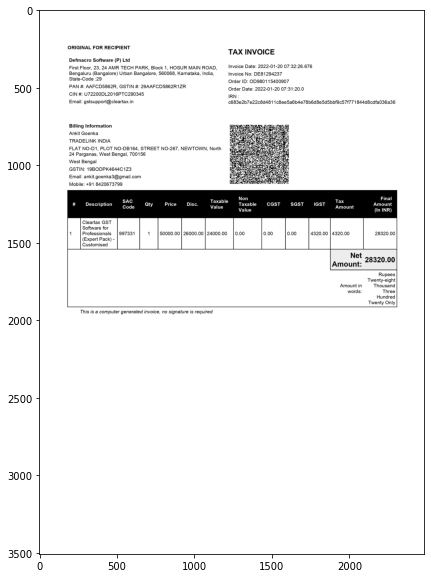

In [5]:
# Load the scanned image of the document, in this case the receipt/invoice
img = cv2.imread('cleartax-invoice.jpg', 0)

# Visualize the image using matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize = (40,10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Preprocess the images so that it is suitable for the tesseract engine to read
img = cv2.threshold(img,185,255,cv2.THRESH_BINARY)[1]


"""
Some available functions from openCV for preprocessing:

Median filter: median filter blurs out noises by taking the medium from a set of pixels
cv2.medianBlur()

Dilation and erosion: dilation adds pixels to boundaries of pixels, erosion removes it
cv2.dilate()
cv2.erode()
cv2.opening() #This is an erosion followed by a dilation
"""

In [6]:
"""
Available Retrievalsh Functions from PyTesseract:
pytesseract.image_to_string() # returns the result in a string format
pytesseract.image_to_boxes() # returns result of recognized characters and its bounding boxes
pytesseract.image_to_data() # returns a detailed results containing boundaries and confidences
pytesseract.image_to_osd() # returns result containing orientation and script detection
pytesseract.image_to_alto_xml() # returns result in auto_xml format
pytesseract.run_and_get_output() # returns raw output from the OCR
"""

# Using the tesseract engine to convert the scanned image into texts
document = pytesseract.image_to_string(img)
print(document)

ORIGINAL FOR RECIPIENT

TAX INVOICE
Defmacro Software (P) Ltd
First Floor, 23, 24 AMR TECH PARK, Block 1, HOSUR MAIN ROAD, _!nvoice Date: 2022-01-20 07:32:26.676
Bengaluru (Bangalore) Urban Bangalore, 560068, Karnataka, India, Invoice No: DE81294237

State-Code :29 Order ID: OD980115400907
PAN #: AAFCD5862R, GSTIN #: 29AAFCD5862R1ZR Order Date: 2022-01-20 07:31:20.0

CIN #: U72200DL2016PTC290345 IRN:
Email: gstsupport@cleartax.in c683e2b7e22c8d4811 c8eeSaGb4e78b6d8e5d5bbf9c5 777 1844d8cdfa036a36

Billing Information
Ankit Goenka
TRADELINK INDIA

FLAT NO-D1, PLOT NO-DB164, STREET NO-267, NEWTOWN, North
24 Parganas, West Bengal, 700156

West Bengal

GSTIN: 19BODPK4644C1Z3
Email: ankit.goenka3@gmail.com
Mobile: +91 8420673799

SAC mlarl
# Description Price Disc. CGST SGST IGST Amount
Code (In INR)

Cleartax GST

Software for

Professionals | 997331 50000.00 | 26000.00 | 24000.00 4320.00 | 4320.00 28320.00
(Expert Pack) -

Customised

28320.00

Net
Amount:

Rupees

Twenty-eight

Amount in 

In [7]:
"""
get_info() function reads the image using openCV and performs thresholding, dilation, noise removal, and
contouring to finally retrieve bounding boxes from the contour.
Below are some of the additional available functions from openCV for preprocessing:
Median filter: median filter blurs out noises by taking the medium from a set of pixels
cv2.medianBlur()
Dilation and erosion: dilation adds pixels to boundaries of pixels, erosion removes it
cv2.dilate()
cv2.erode()
cv2.opening() #This is an erosion followed by a dilation
"""

def get_info(path):
    font     = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    fontColor  = (255,0,0)
    lineType = 1

    #Threshold
    image = cv2.imread(path)

    height,width,channel = image.shape
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    T = threshold_local(gray, 15, offset = 6, method = "gaussian") # generic, mean, median, gaussian
    thresh = (gray > T).astype("uint8") * 255
    thresh = ~thresh

    #Dilation
    kernel =np.ones((1,1), np.uint8)
    ero = cv2.erode(thresh, kernel, iterations= 1)
    img_dilation = cv2.dilate(ero, kernel, iterations=1)

    # Remove noise
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_dilation, None, None, None, 8, cv2.CV_32S)
    sizes = stats[1:, -1] #get CC_STAT_AREA component
    final = np.zeros((labels.shape), np.uint8)
    for i in range(0, nlabels - 1):
        if sizes[i] >= 10:   #filter small dotted regions
            final[labels == i + 1] = 255

    #Find contours
    kern = np.ones((5,15), np.uint8)
    img_dilation = cv2.dilate(final, kern, iterations = 1)
    contours, hierarchy = cv2.findContours(img_dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    # Map contours to bounding rectangles, using bounding_rect property
    rects = map(lambda c: cv2.boundingRect(c), contours)
    # Sort rects by top-left x (rect.x == rect.tl.x)
    sorted_rects = sorted(rects, key =lambda r: r[0])
    sorted_rects = sorted(sorted_rects, key =lambda r: r[1])

    etfo=''
    for rect in sorted_rects:
        x,y,w,h = rect
        if(w<20 or h<20):
            continue
        temp = image[y:y+h, x:x+w]
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        hi = pytesseract.image_to_data(temp, config=r'--psm 6')
        hi = hi.split()
        ind = 22
        while(True):
            if (ind>len(hi)):
                break
            if(int(float(hi[ind])==-1)):
                ind+=11
            else:
                etfo=etfo+hi[ind+1]
                etfo=etfo+" "
                x+=len(hi[ind+1])*20
                ind+=12
        etfo=etfo+'\n'
    return etfo

In [8]:
def extractProductsKVP(document):
    shopList = {}
    beginList = False # Flag to determine whether the list of items purchased has begun

    # Split the document into lines
    for line in document.splitlines(): 

        # Ignore lines where only space are detected
        if line == '' or line.isspace(): 
            continue

        # The list begins when the CASH RECEIPT line is read, and ends when Total is read    
        if 'State-Code' in line:
            beginList = True
            '''
            continue
        if 'Total' in line:
            beginList = False
            '''

        if beginList:
            # Splitting products into key and value
            products = line.split(' ')
            print(products)

            #adding the key and value pair of data
            shopList[products[0]] = products[1]
    return shopList

In [9]:
"""
The following LSTM is the model to use after the OCR extraction, where it predicts the key-value pairs after the texts
are extracted using the previous get_info() method.
"""
class ExtractLSTM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=2, bidirectional=True)
        self.linear = nn.Linear(hidden_size * 2, 5)

    def forward(self, inpt):
        embedded = self.embed(inpt)
        feature, _ = self.lstm(embedded)
        oupt = self.linear(feature)
        return oupt

In [10]:
def pred_to_dict(text, pred, prob):
    res = {"company": ("", 0), "date": ("", 0), "address": ("", 0), "total": ("", 0)}
    keys = list(res.keys())
    seps = [0] + (np.nonzero(np.diff(pred))[0] + 1).tolist() + [len(pred)]
    for i in range(len(seps) - 1):
        pred_class = pred[seps[i]] - 1
        if pred_class == -1:
            continue

        new_key = keys[pred_class]
        new_prob = prob[seps[i] : seps[i + 1]].max()
        if new_prob > res[new_key][1]:
            res[new_key] = (text[seps[i] : seps[i + 1]], new_prob)

    return {k: regex.sub(r"[\t\n]", " ", v[0].strip()) for k, v in res.items()}

 
def test(model):
    model.eval() 
    with torch.no_grad():
            oupt = model(text_tensor)
            prob = torch.nn.functional.softmax(oupt, dim=2)
            prob, pred = torch.max(prob, dim=2)
            prob = prob.squeeze().cpu().numpy()
            pred = pred.squeeze().cpu().numpy()
            real_text = etfo
            result = pred_to_dict(real_text, pred, prob)
            with open("output.json", "w", encoding="utf-8") as json_opened:
                json.dump(result, json_opened, indent=4)
            return result

In [ ]:
VOCAB= ascii_uppercase+digits+punctuation+" \t\n"

#Change to CUDA to run using GPU
device = 'cpu'

def get_test_data(etfo):  
    text = etfo
    text_tensor = torch.zeros(len(text), 1, dtype=torch.long)
    text_tensor[:, 0] = torch.LongTensor([VOCAB.find(c) for c in text])
    return text_tensor.to(device)

etfo = get_info('cleartax-invoice.jpg')
# etfo = get_info('X51005621482.jpeg')
etfo = etfo.upper()
text_tensor = get_test_data(etfo)
temp = []
for i in range(len(text_tensor)):
    if text_tensor[i]>=0 and text_tensor[i]<=70:
        temp.append([int(text_tensor[i])])
text_tensor = torch.LongTensor(temp)

#model initialization
hidden_size = 256
device= torch.device('cpu')
model = ExtractLSTM(len(VOCAB), 16, hidden_size).to(device)
model.load_state_dict(torch.load('model.pth'))
result = test(model)
print(result)

In [19]:
shopList = extractProductsKVP(document)
print(shopList)

['State-Code', ':29', 'Order', 'ID:', 'OD980115400907']
['PAN', '#:', 'AAFCD5862R,', 'GSTIN', '#:', '29AAFCD5862R1ZR', 'ere']
['CIN', '#:', 'U72200DL2016PTC290345', 'FN', '«']
['Email:', 'gstsupport@cleartax.in', 'c683e2b7e22c8d481', '1', 'c8eeSa6b4e78b6d8e5d5bbf9c5', '7F77', '1844d8cdfa036a36']
['Billing', 'Information']
['Ankit', 'Goenka']
['TRADELINK', 'INDIA']
['FLAT', 'NO-D1,', 'PLOT', 'NO-DB164,', 'STREET', 'NO-267,', 'NEWTOWN,', 'North']
['24', 'Parganas,', 'West', 'Bengal,', '700156']
['West', 'Bengal']
['GSTIN:', '19BODPK4644C1Z3']
['Email:', 'ankit.goenka3@gmail.com']
['Mobile:', '+91', '8420673799']
['Final']


IndexError: list index out of range

In [5]:
img = cv2.imread("cleartax-invoice.jpg")
cv2.imshow("Image1", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
img = cv2.imread("kaagaz.jpg")
text2 = pytesseract.image_to_string(img)
print(text2)

(TRIPLICATE FOR SUPPLIER)
Invoic&, Yo. RGNA/21-22/0403 Dated 5-Nov-21
Ref. No™%
R.G.NETWORKS

375,PRINCE ANWAR SHAH ROAD
SHOP-BO06A
SOUTH CITY MALL BASEMENT,KOLKATA-700068
TEL:+913340046789
GSTIN/UIN; 19AAPFR6651K1ZF
State Name : West Bengal, Code : 19

Tax Invoice

Party : ANKIT GOENKA

Kolkata
8420673799
State Name __: West Bengal, Code : 19
sl Description of Goods HSN/SAC Quantity Rate per Amount
No
1 SAMSUNG A52-(A525FZBH)-8/128GB 85171211 1nos 24,575.42 nos 24,575.42
Godown: Samsung Acropolis 1 nos
Batch: 352938778132766 1 nos
CGST 2,211.79
SGST 2,211.79
Total 1nos = 28,999.00
“Amount Chargeable (in words) E&O.E
INR Twenty Eight Thousand Nine Hundred Ninety Nine Only
HSN/SAC Taxable Central Tax State Tax Total
k - Value Rate Amount Rate Amount Tax Amount
85171211 7 __ 24,575.42 9% 2,211.79 9% 2,211.79 4.423.58
Total 24,575.42 2,211.79 2,211.79 4,423.58

Tax Amount (in words) : INR Four Thousand Four Hundred Twenty Three and Fifty Eight paise Only
Company's PAN : AAPFR6651K

Declar

In [ ]:
import cv2
import pytesseract
from gtts import gTTS
import os
rev = cv2.imread("Reviews\15.PNG")

# cv2.imshow("Image", rev)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

txt = pytesseract.image_to_string(rev)
print(txt)
language = 'en'
outObj = gTTS(text=txt, lang=language, slow=False)
outObj.save("rev.mp3")
print('playing the audio file')
os.system('rev.mp3')